# Быстрое вычисление синуса за счет приближения полиномом 3 степени

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
def equation(x):
    return np.sin(x)

X = np.linspace(0, np.pi/2, 1000).reshape(-1, 1)
y = equation(X)

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

coefficients = model.coef_

print("Coefficients:", coefficients)

y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", np.sqrt(mse))

Coefficients: [[-0.00224576  1.02713452 -0.0699318  -0.11386077]]
Mean Squared Error: 0.0008363862130320406


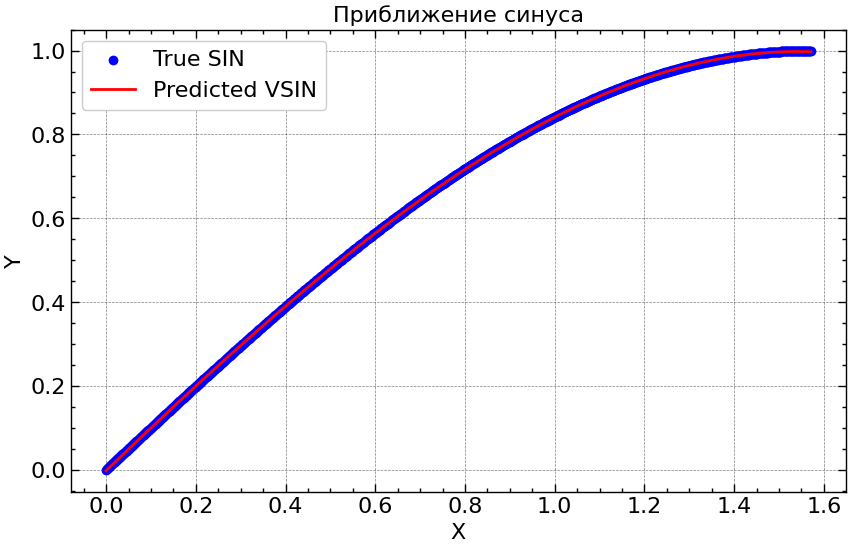

In [3]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

# Нарисуйте графики
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='True SIN')
plt.plot(X, y_pred, color='red', label='Predicted SIN')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Приближение синуса')
plt.legend()
plt.show()

In [4]:
def aSin(x):
    if x<0: return -aSin(-x)
    if x>2*np.pi: return aSin(np.mod(x, 2 * np.pi))
    if x>np.pi: return -aSin(x-np.pi)
    if x>np.pi/2: return aSin(np.pi-x)
    a = [-0.00224576, 1.02713452, -0.0699318, -0.11386077]
    return a[0]+x*(a[1]+x*(a[2]+x*a[3]))    

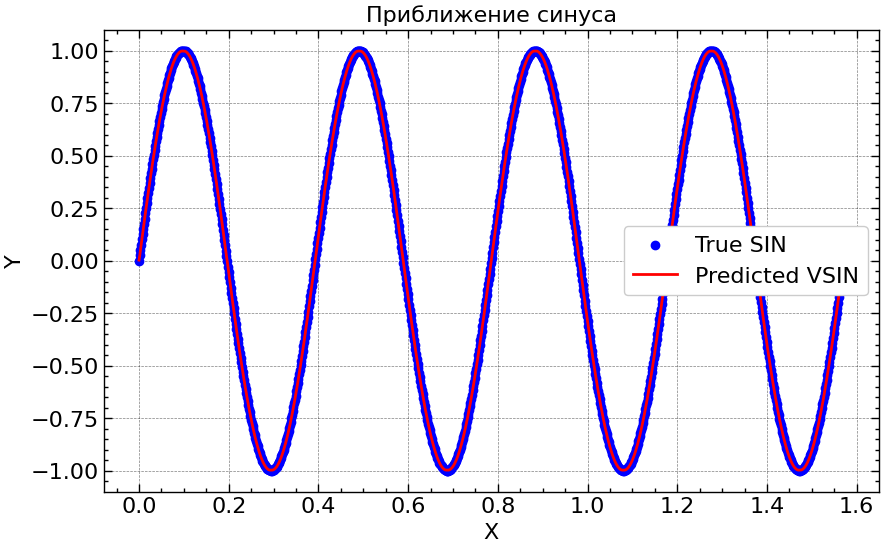

0.0008357367600961326


In [15]:
a_sin = np.vectorize(aSin)
x = np.linspace(-4*np.pi, 4*np.pi, 1000).reshape(-1, 1)
y = np.sin(x)
y_pred = a_sin(x)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='True SIN')
plt.plot(X, y_pred, color='red', label='Predicted SIN')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Приближение синуса')
plt.legend()
plt.show()

print(np.sqrt(mean_squared_error(y, y_pred)))

In [18]:
def aCos(x):
    return aSin(np.pi/2-x)

a_cos = np.vectorize(aCos)

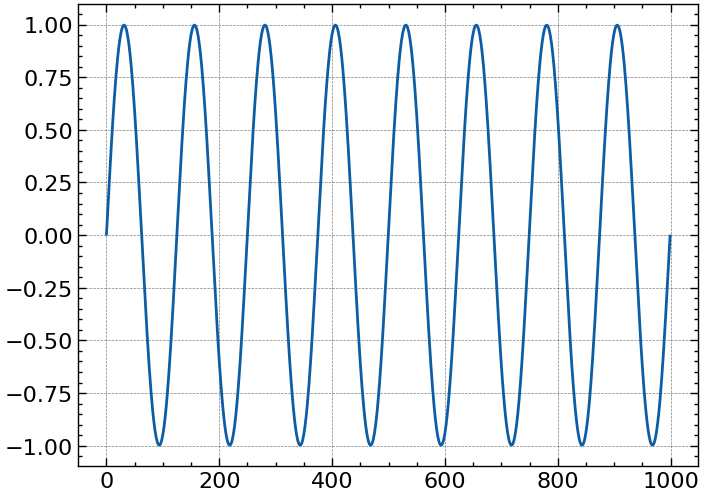

In [19]:
plt.plot(2*a_sin(x)*a_cos(x))

In [27]:
import numpy as np

A = np.array([[1.0001,2],[2,4.0001]])

y= np.array([5,10])
A

array([[1.0001, 2.    ],
       [2.    , 4.0001]])

In [28]:
np.linalg.inv(A)@y

array([0.99998, 1.99996])